In [1]:
import sys
sys.path.append('../..')
from TO.utils import check_package_status
check_package_status()

from experiments.utils import set_plt_template
set_plt_template()

<div class="alert alert-block alert-success" style="font-size: 14px; border-radius: 10px"><h4>[GO] TO @ 1804a0729e6f5183b73e4b1eb7a439c5e592de7c</h4><pre>  ✅ No changes found in the ./TO packge.</pre></div>

In [2]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

experiments = glob('./results/*/')
budget = lambda d : d*100
runs = 30

results = {}
for exp in experiments:
    if ('ELA' in exp) : continue
    evals = np.empty((runs, budget(int(exp.split('/')[-2].split('-')[0][:-1]))))
    evals[:] = np.inf
    for i in range(runs):
        fn = os.path.join(exp, f'{i+1}/evals.dat')
        if os.path.exists(fn):
            with open(fn, 'r') as handle : lines = handle.readlines()
            f = np.array([float(line.split()[1]) for line in lines])
            evals[i,:f.size] = f
    evals_min = np.minimum.accumulate(evals, axis=1)
    evals_min = evals_min[evals_min[:,0] != np.inf]
    results[exp.split('/')[-2]] = evals_min

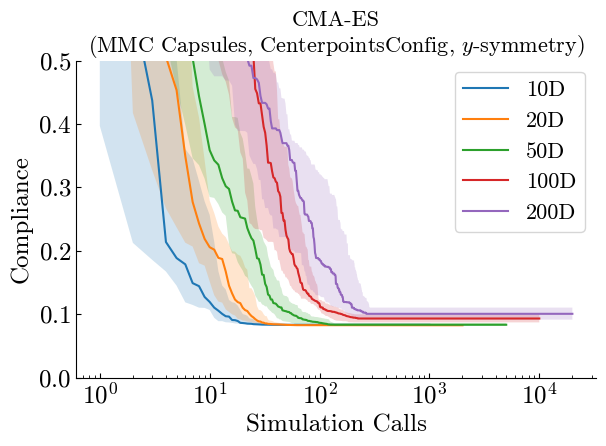

In [16]:
fig, ax = plt.subplots(sharey=True, sharex=True)

for (dim) in (10, 20, 50, 100, 200):
    Q2 = np.median(results[f'{dim}D'], axis=0)
    (Q1, Q3) = np.percentile(results[f'{dim}D'], [25, 75], axis=0)

    ax.semilogx(np.arange(Q2.size)+1, Q2, label=f'{dim}D')
    ax.fill_between(np.arange(Q2.size)+1, Q1, Q3, alpha=.2)
    ax.set_ylim(0, 0.5)

ax.legend(fontsize=16)
ax.set_ylabel('Compliance')
ax.set_xlabel('Simulation Calls')
ax.set_title('CMA-ES\n(MMC Capsules, CenterpointsConfig, $y$-symmetry)', fontsize=16)

fig.tight_layout()